**Problem 2 - Integrator**

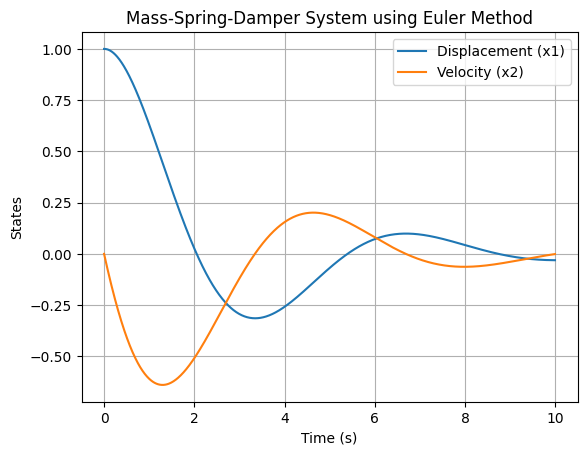

In [6]:
import numpy as np
import matplotlib.pyplot as plt

params = {
    "m": 1.0,
    "d": 0.7,
    "k": 1.0
}

def x_dot(t, x, params):
    x_1, x_2 = x # Extract state variables
    m = params["m"]
    d = params["d"]
    k = params["k"]

    dxdt_1 = x_2
    dxdt_2 = -k/m*x_1 - d/m*x_2
    return [dxdt_1, dxdt_2] # Must have same shape as y

dt = 0.01
t_start = 0
t_end = 10 

t = np.arange(t_start, t_end, dt)

x1 = np.zeros(len(t))
x2 = np.zeros(len(t))

x1[0] = 1
x2[0] = 0

for i in range(1, len(t)):
    x_prev = [x1[i-1], x2[i-1]]
    dxdt = x_dot(t[i-1], x_prev, params)
    x1[i] = x1[i-1] + dxdt[0] * dt
    x2[i] = x2[i-1] + dxdt[1] * dt


plt.plot(t, x1, label='Displacement (x1)')
plt.plot(t, x2, label='Velocity (x2)')
plt.xlabel('Time (s)')
plt.ylabel('States')
plt.title('Mass-Spring-Damper System using Euler Method')
plt.legend()
plt.grid()
plt.show()


**Problem 3 - Analytical solution and comparison**

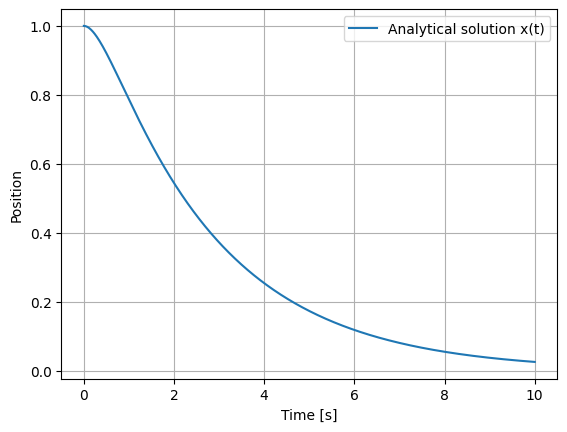

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def x_analytical(t, x0, v0, params):
    m = params["m"]
    d = params["d"]
    k = params["k"]
    
    w_n = np.sqrt(params["k"]/params["m"])
    zeta = params["d"]/(2*np.sqrt(params["k"]*params["m"]))
    err = 1e-6 
    
    #Overdampened   
    if zeta>1:
        r_1 = -w_n*(zeta - np.sqrt(zeta**2 - 1))
        r_2 = -w_n*(zeta + np.sqrt(zeta**2 - 1))
        C_1 = (v0 - r_2*x0)/(r_1 - r_2)
        C_2 = x0-C_1
        
        x = C_1*np.exp(r_1*t) + C_2*np.exp(r_2*t)
        return x
    
    #Critically dampened
    elif 1-err<zeta<1+err:
        x = (x0 + (v0 + w_n*x0)*t)*np.exp(-w_n*t)
        return x
        
    #Underdampened
    elif zeta>=0:
        w_d = w_n*np.sqrt(1 - zeta**2)
        x = np.exp(-zeta*w_n*t)*(x0*np.cos(w_d*t) + (v0 + zeta*w_n*x0)/w_d*np.sin(w_d*t))
        return x
    
# Parameters (try changing d to see different damping regimes)
params = {
"m": 1.0,
"k": 1.0,
"d": 3 
}
# Time vector
t = np.linspace(0.0, 10.0, 1000)
# Initial conditions
x0 = 1.0
v0 = 0.0
# Analytical solution
x = x_analytical(t, x0, v0, params)
# Plot
plt.figure()
plt.plot(t, x, label="Analytical solution x(t)")
plt.xlabel("Time [s]")
plt.ylabel("Position")
plt.legend()
plt.grid()
plt.show()
    
    

*Both*

Underdamped case


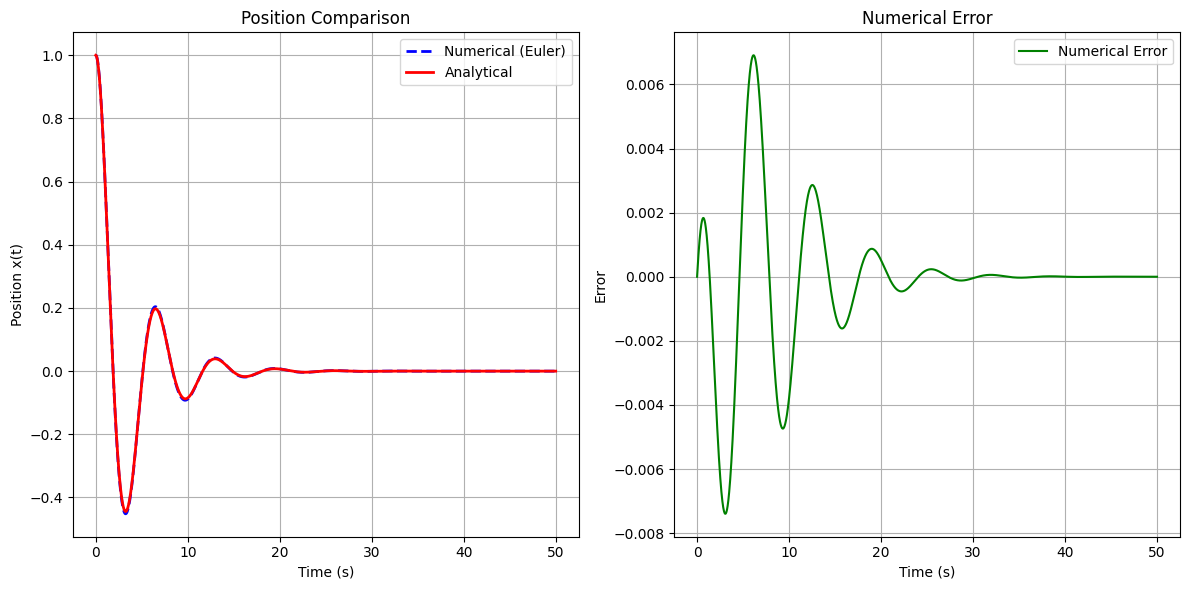

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters once
params = {
    "m": 1.0,
    "d": 0.5,
    "k": 1.0
}

def y_dot(t, y, params):
    """System of ODEs for mass-spring-damper system"""
    y_1, y_2 = y  # Extract state variables (position, velocity)
    m = params["m"]
    d = params["d"]
    k = params["k"]
    
    dydt_1 = y_2  # dx/dt = velocity
    dydt_2 = -k/m*y_1 - d/m*y_2  # dv/dt = acceleration
    return [dydt_1, dydt_2]

def x_analytical(t, x0, v0, params):
    """Analytical solution for mass-spring-damper system"""
    m = params["m"]
    d = params["d"]
    k = params["k"]
    
    w_n = np.sqrt(k/m)
    zeta = d/(2*np.sqrt(k*m))
    err = 1e-6 
    
    # Overdamped   
    if zeta > 1:
        print("Overdamped case")
        r_1 = -w_n*(zeta - np.sqrt(zeta**2 - 1))
        r_2 = -w_n*(zeta + np.sqrt(zeta**2 - 1))
        C_1 = (v0 - r_2*x0)/(r_1 - r_2)
        C_2 = x0 - C_1
        x = C_1*np.exp(r_1*t) + C_2*np.exp(r_2*t)
        
    # Critically damped
    elif 1-err < zeta < 1+err:
        print("Critically damped case")
        x = (x0 + (v0 + w_n*x0)*t)*np.exp(-w_n*t)
        
    # Underdamped
    elif zeta >= 0:
        print("Underdamped case")
        w_d = w_n*np.sqrt(1 - zeta**2)
        x = np.exp(-zeta*w_n*t)*(x0*np.cos(w_d*t) + (v0 + zeta*w_n*x0)/w_d*np.sin(w_d*t))
    
    return x

# Simulation parameters
dt = 0.01
t_start = 0
t_end = 50
t = np.arange(t_start, t_end, dt)

# Initial conditions
x0 = 1.0
v0 = 0.0

# Numerical solution using Euler method
x1_num = np.zeros(len(t))
x2_num = np.zeros(len(t))
x1_num[0] = x0
x2_num[0] = v0

for i in range(1, len(t)):
    y_prev = [x1_num[i-1], x2_num[i-1]]
    dydt = y_dot(t[i-1], y_prev, params)
    x1_num[i] = x1_num[i-1] + dydt[0] * dt
    x2_num[i] = x2_num[i-1] + dydt[1] * dt

# Analytical solution
x1_analytical = x_analytical(t, x0, v0, params)

# Plot comparison
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(t, x1_num, 'b--', label='Numerical (Euler)', linewidth=2)
plt.plot(t, x1_analytical, 'r-', label='Analytical', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Position x(t)')
plt.title('Position Comparison')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
error = x1_num - x1_analytical
plt.plot(t, error, 'g-', label='Numerical Error')
plt.xlabel('Time (s)')
plt.ylabel('Error')
plt.title('Numerical Error')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

Higher dampening factor leads to lower numerical error. Lower leads to more